In [3]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Padding function
def pad_image(image, target_size=(300, 300)):
    """
    Pads or resizes the image to match the target size.
    Args:
    - image: Input image (H, W, C)
    - target_size: Tuple (height, width) specifying desired output size
    
    Returns:
    - Padded or resized image of shape (target_size[0], target_size[1], C)
    """
    h, w, c = image.shape
    target_h, target_w = target_size

    if h > target_h or w > target_w:
        return cv2.resize(image, target_size)
    
    delta_h = target_h - h
    delta_w = target_w - w
    top = delta_h // 2
    bottom = delta_h - top
    left = delta_w // 2
    right = delta_w - left

    return cv2.copyMakeBorder(image, top, bottom, left, right, 
                              borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0])

# Load dataset with padding
def load_dataset_with_padding(dataset_path, target_size=(300, 300)):
    images = []
    labels = []
    
    for class_name in os.listdir(dataset_path):
        class_folder = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder):
            for image_name in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_name)
                if image_path.endswith(('.jpg', '.png')):
                    image = cv2.imread(image_path)
                    if image is not None:
                        padded_image = pad_image(image, target_size)
                        images.append(padded_image)
                        labels.append(class_name)
    
    return np.array(images), np.array(labels)

# Load and preprocess dataset
dataset_path = "./Our_Dataset/Cropped_Components"  # Update with your dataset path
images, labels = load_dataset_with_padding(dataset_path, target_size=(300, 300))

# Normalize images
images = images / 255.0

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Print shapes for verification
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Build a simple CNN model
def build_simple_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Instantiate and compile the model
input_shape = X_train.shape[1:]  # Shape of a single input image
num_classes = y_train.shape[1]  # Number of unique classes
model = build_simple_cnn(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    verbose=1)

# Save the trained model
model_save_path = "./simple_cnn_model.h5"
save_model(model, model_save_path)
print(f"Model saved to {model_save_path}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# Optionally, load the model to verify saving
loaded_model = load_model(model_save_path)
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Loaded model test accuracy: {loaded_test_accuracy:.2f}")


X_train shape: (2574, 300, 300, 3), y_train shape: (2574, 6)
X_test shape: (644, 300, 300, 3), y_test shape: (644, 6)


C:\Users\omcch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 52s 625ms/step - accuracy: 0.4524 - loss: 1.9888 - val_accuracy: 0.6071 - val_loss: 1.0609
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 48s 593ms/step - accuracy: 0.6320 - loss: 1.0387 - val_accuracy: 0.6165 - val_loss: 0.9624
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 48s 592ms/step - accuracy: 0.6613 - loss: 0.8912 - val_accuracy: 0.6460 - val_loss: 0.9511
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 49s 603ms/step - accuracy: 0.7112 - loss: 0.7931 - val_accuracy: 0.6832 - val_loss: 0.9038
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 49s 607ms/step - accuracy: 0.7582 - loss: 0.6448 - val_accuracy: 0.6537 - val_loss: 0.9907
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 50s 613ms/step - accuracy: 0.7864 - loss: 0.5572 - val_accuracy: 0.6879 - val_loss: 0.9216
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 53s 651ms/step - accuracy: 0.8071 - loss: 0.5064 - val_accuracy: 0.6770 - val_loss: 0.9882
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 51s 633ms/step - accuracy: 0.8429 - loss: 0.4133 - val_accu

Model saved to ./simple_cnn_model.h5
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.6442 - loss: 1.9588
Test accuracy: 0.66


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.6442 - loss: 1.9588
Loaded model test accuracy: 0.66


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step


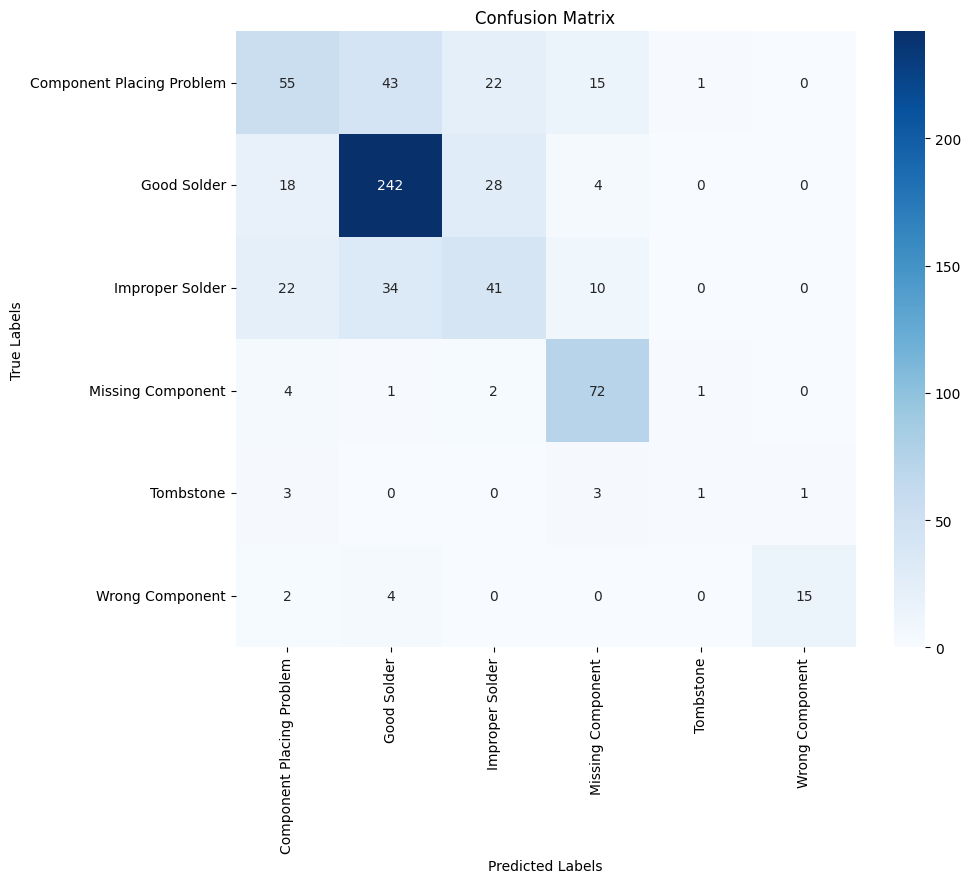

Classification Report:
                           precision    recall  f1-score   support

Component Placing Problem       0.53      0.40      0.46       136
              Good Solder       0.75      0.83      0.79       292
          Improper Solder       0.44      0.38      0.41       107
        Missing Component       0.69      0.90      0.78        80
                Tombstone       0.33      0.12      0.18         8
          Wrong Component       0.94      0.71      0.81        21

                 accuracy                           0.66       644
                macro avg       0.61      0.56      0.57       644
             weighted avg       0.64      0.66      0.65       644



In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict the test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report
class_report = classification_report(true_classes, predicted_classes, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)
